In [40]:
import pandas as pd
import numpy as np
import plotly.express as px

In [41]:
df = pd.read_csv("zomato.csv")
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [43]:
df.drop(["url" , "address" , "phone" , "reviews_list" , "menu_item"] , axis = 1 , inplace = True)

In [44]:
df.duplicated().sum()

108

In [45]:
df.drop_duplicates(inplace = True)

In [46]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                    location  \
0            Yes   4.1/5    775                Banashankari   
1             No   4.1/5    787                Banashankari   
2             No   3.8/5    918                Banashankari   
3             No   3.7/5     88                Banashankari   
4             No   3.8/5    166                Basavanagudi   
...          ...     ...    ...                         ...   
51712         No  3.6 /5     27                  Whitefield   
51713         No     NaN      0                  Whitefield   
51714         No     NaN      0                  Whitefield   
51715        Yes  4.3 /5    236  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51712                  Bar                                                NaN   
51713                  Bar                                                NaN   
51714                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                     cuisines approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                         800   
1                 Chinese, North Indian, Thai                         800   
2                      Cafe, Mexican, Italian                         800   
3                  South Indian, North Indian                         300   
4                    North Indian, Rajasthani                         600   
...                                       ...                         ...   
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

      listed_in(type) listed_in(city)  
0              Buffet    Banashankari  
1              Buffet    Banashankari  
2              Buffet    Banashankari  
3              Buffet    Banashankari  
4              Buffet    Banashankari  
...               ...             ...  
51712   Pubs and bars      Whitefield  
51713   Pubs and bars      Whitefield  
51714   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield  

[51609 rows x 12 columns]

In [47]:
df.reset_index(drop = True , inplace = True)

In [48]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51604  Best Brews - Four Points by Sheraton Bengaluru...           No   
51605                           Vinod Bar And Restaurant           No   
51606  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51607  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51608                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                    location  \
0            Yes   4.1/5    775                Banashankari   
1             No   4.1/5    787                Banashankari   
2             No   3.8/5    918                Banashankari   
3             No   3.7/5     88                Banashankari   
4             No   3.8/5    166                Basavanagudi   
...          ...     ...    ...                         ...   
51604         No  3.6 /5     27                  Whitefield   
51605         No     NaN      0                  Whitefield   
51606         No     NaN      0                  Whitefield   
51607        Yes  4.3 /5    236  ITPL Main Road, Whitefield   
51608         No  3.4 /5     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51604                  Bar                                                NaN   
51605                  Bar                                                NaN   
51606                  Bar                                                NaN   
51607                  Bar                       Cocktails, Pizza, Buttermilk   
51608   Bar, Casual Dining                                                NaN   

                                     cuisines approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                         800   
1                 Chinese, North Indian, Thai                         800   
2                      Cafe, Mexican, Italian                         800   
3                  South Indian, North Indian                         300   
4                    North Indian, Rajasthani                         600   
...                                       ...                         ...   
51604                             Continental                       1,500   
51605                             Finger Food                         600   
51606                             Finger Food                       2,000   
51607                             Finger Food                       2,500   
51608  Finger Food, North Indian, Continental                       1,500   

      listed_in(type) listed_in(city)  
0              Buffet    Banashankari  
1              Buffet    Banashankari  
2              Buffet    Banashankari  
3              Buffet    Banashankari  
4              Buffet    Banashankari  
...               ...             ...  
51604   Pubs and bars      Whitefield  
51605   Pubs and bars      Whitefield  
51606   Pubs and bars      Whitefield  
51607   Pubs and bars      Whitefield  
51608   Pubs and bars      Whitefield  

[51609 rows x 12 columns]

In [49]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [50]:
df["name"].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Vivi's Food Joint                                           1
CHAATter Box                                                1
Bake Delite                                                 1
Mother's Rasoi Family Restaurant                            1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64

In [51]:
df[df["name"] == "Cafe Coffee Day"]

name online_order book_table    rate  votes  \
22     Cafe Coffee Day           No         No   3.6/5     28   
254    Cafe Coffee Day          Yes         No   3.2/5     17   
624    Cafe Coffee Day           No         No     NaN      0   
888    Cafe Coffee Day           No         No   3.6/5     19   
1185   Cafe Coffee Day          Yes         No   3.7/5     26   
...                ...          ...        ...     ...    ...   
49586  Cafe Coffee Day          Yes         No  3.1 /5     13   
50014  Cafe Coffee Day          Yes         No  3.6 /5     45   
50177  Cafe Coffee Day          Yes         No  3.6 /5     45   
50896  Cafe Coffee Day           No         No     NaN      0   
51083  Cafe Coffee Day          Yes         No  3.6 /5     45   

                location rest_type           dish_liked         cuisines  \
22          Banashankari      Cafe                  NaN  Cafe, Fast Food   
254            Jayanagar      Cafe                  NaN  Cafe, Fast Food   
624         Banashankari      Cafe                  NaN  Cafe, Fast Food   
888    Bannerghatta Road      Cafe                  NaN  Cafe, Fast Food   
1185   Bannerghatta Road      Cafe                  NaN  Cafe, Fast Food   
...                  ...       ...                  ...              ...   
49586      Sarjapur Road      Cafe                  NaN  Cafe, Fast Food   
50014         Whitefield      Cafe  Sandwiches, Brownie             Cafe   
50177         Whitefield      Cafe  Sandwiches, Brownie             Cafe   
50896         Whitefield      Cafe                  NaN  Cafe, Fast Food   
51083         Whitefield      Cafe  Sandwiches, Brownie             Cafe   

      approx_cost(for two people) listed_in(type)    listed_in(city)  
22                            900           Cafes       Banashankari  
254                           900        Delivery       Banashankari  
624                           900        Dine-out       Banashankari  
888                           900           Cafes  Bannerghatta Road  
1185                          900        Delivery  Bannerghatta Road  
...                           ...             ...                ...  
49586                         900        Dine-out      Sarjapur Road  
50014                         650           Cafes         Whitefield  
50177                         650        Delivery         Whitefield  
50896                         900        Desserts         Whitefield  
51083                         650        Dine-out         Whitefield  

[96 rows x 12 columns]

In [52]:
df["online_order"].value_counts()

online_order
Yes    30361
No     21248
Name: count, dtype: int64

In [53]:
df["book_table"].value_counts()

book_table
No     45193
Yes     6416
Name: count, dtype: int64

#### Fuzzy Wuzzy 

In [54]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [55]:
def fix_rate(r):
    try:
        return float(r[0:3])
    except:
        return np.nan

In [56]:
df["rate"] = df["rate"].apply(fix_rate)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51609 entries, 0 to 51608
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         41590 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   dish_liked                   23595 non-null  object 
 8   cuisines                     51564 non-null  object 
 9   approx_cost(for two people)  51265 non-null  object 
 10  listed_in(type)              51609 non-null  object 
 11  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


In [58]:
df["votes"].describe()

count    51609.000000
mean       283.283361
std        803.282771
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [59]:
px.box(data_frame=df , x = "votes")

In [60]:
df["location"].value_counts()

location
BTM                      5109
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [61]:
sorted(df["location"].astype(str).unique())

['BTM',
 'Banashankari',
 'Banaswadi',
 'Bannerghatta Road',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Bommanahalli',
 'Brigade Road',
 'Brookefield',
 'CV Raman Nagar',
 'Central Bangalore',
 'Church Street',
 'City Market',
 'Commercial Street',
 'Cunningham Road',
 'Domlur',
 'East Bangalore',
 'Ejipura',
 'Electronic City',
 'Frazer Town',
 'HBR Layout',
 'HSR',
 'Hebbal',
 'Hennur',
 'Hosur Road',
 'ITPL Main Road, Whitefield',
 'Indiranagar',
 'Infantry Road',
 'JP Nagar',
 'Jakkur',
 'Jalahalli',
 'Jayanagar',
 'Jeevan Bhima Nagar',
 'KR Puram',
 'Kaggadasapura',
 'Kalyan Nagar',
 'Kammanahalli',
 'Kanakapura Road',
 'Kengeri',
 'Koramangala',
 'Koramangala 1st Block',
 'Koramangala 2nd Block',
 'Koramangala 3rd Block',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Koramangala 8th Block',
 'Kumaraswamy Layout',
 'Langford Town',
 'Lavelle Road',
 'MG Road',
 'Magadi Road',
 'Majestic',
 'Malleshwaram',
 'M

In [62]:
sorted(df["rest_type"].astype(str).unique())

['Bakery',
 'Bakery, Beverage Shop',
 'Bakery, Cafe',
 'Bakery, Dessert Parlor',
 'Bakery, Food Court',
 'Bakery, Kiosk',
 'Bakery, Quick Bites',
 'Bakery, Sweet Shop',
 'Bar',
 'Bar, Cafe',
 'Bar, Casual Dining',
 'Bar, Lounge',
 'Bar, Pub',
 'Bar, Quick Bites',
 'Beverage Shop',
 'Beverage Shop, Cafe',
 'Beverage Shop, Dessert Parlor',
 'Beverage Shop, Quick Bites',
 'Bhojanalya',
 'Cafe',
 'Cafe, Bakery',
 'Cafe, Bar',
 'Cafe, Casual Dining',
 'Cafe, Dessert Parlor',
 'Cafe, Food Court',
 'Cafe, Lounge',
 'Cafe, Quick Bites',
 'Casual Dining',
 'Casual Dining, Bar',
 'Casual Dining, Cafe',
 'Casual Dining, Irani Cafee',
 'Casual Dining, Lounge',
 'Casual Dining, Microbrewery',
 'Casual Dining, Pub',
 'Casual Dining, Quick Bites',
 'Casual Dining, Sweet Shop',
 'Club',
 'Club, Casual Dining',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dessert Parlor, Bakery',
 'Dessert Parlor, Beverage Shop',
 'Dessert Parlor, Cafe',
 'Dessert Parlor, Food Court',
 'Dessert Parlor, Kiosk',
 

In [63]:
df.drop("dish_liked" , axis = 1 , inplace = True)

In [64]:
df.duplicated().sum()

0

In [65]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51604  Best Brews - Four Points by Sheraton Bengaluru...           No   
51605                           Vinod Bar And Restaurant           No   
51606  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51607  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51608                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                    location  \
0            Yes   4.1    775                Banashankari   
1             No   4.1    787                Banashankari   
2             No   3.8    918                Banashankari   
3             No   3.7     88                Banashankari   
4             No   3.8    166                Basavanagudi   
...          ...   ...    ...                         ...   
51604         No   3.6     27                  Whitefield   
51605         No   NaN      0                  Whitefield   
51606         No   NaN      0                  Whitefield   
51607        Yes   4.3    236  ITPL Main Road, Whitefield   
51608         No   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                cuisines  \
0            Casual Dining          North Indian, Mughlai, Chinese   
1            Casual Dining             Chinese, North Indian, Thai   
2      Cafe, Casual Dining                  Cafe, Mexican, Italian   
3              Quick Bites              South Indian, North Indian   
4            Casual Dining                North Indian, Rajasthani   
...                    ...                                     ...   
51604                  Bar                             Continental   
51605                  Bar                             Finger Food   
51606                  Bar                             Finger Food   
51607                  Bar                             Finger Food   
51608   Bar, Casual Dining  Finger Food, North Indian, Continental   

      approx_cost(for two people) listed_in(type) listed_in(city)  
0                             800          Buffet    Banashankari  
1                             800          Buffet    Banashankari  
2                             800          Buffet    Banashankari  
3                             300          Buffet    Banashankari  
4                             600          Buffet    Banashankari  
...                           ...             ...             ...  
51604                       1,500   Pubs and bars      Whitefield  
51605                         600   Pubs and bars      Whitefield  
51606                       2,000   Pubs and bars      Whitefield  
51607                       2,500   Pubs and bars      Whitefield  
51608                       1,500   Pubs and bars      Whitefield  

[51609 rows x 11 columns]

In [66]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [67]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).apply(lambda r : float(r.replace("," , "")))

In [68]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [69]:
sorted(df["listed_in(city)"].unique())

['BTM',
 'Banashankari',
 'Bannerghatta Road',
 'Basavanagudi',
 'Bellandur',
 'Brigade Road',
 'Brookefield',
 'Church Street',
 'Electronic City',
 'Frazer Town',
 'HSR',
 'Indiranagar',
 'JP Nagar',
 'Jayanagar',
 'Kalyan Nagar',
 'Kammanahalli',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Lavelle Road',
 'MG Road',
 'Malleshwaram',
 'Marathahalli',
 'New BEL Road',
 'Old Airport Road',
 'Rajajinagar',
 'Residency Road',
 'Sarjapur Road',
 'Whitefield']

In [70]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51604  Best Brews - Four Points by Sheraton Bengaluru...           No   
51605                           Vinod Bar And Restaurant           No   
51606  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51607  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51608                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                    location  \
0            Yes   4.1    775                Banashankari   
1             No   4.1    787                Banashankari   
2             No   3.8    918                Banashankari   
3             No   3.7     88                Banashankari   
4             No   3.8    166                Basavanagudi   
...          ...   ...    ...                         ...   
51604         No   3.6     27                  Whitefield   
51605         No   NaN      0                  Whitefield   
51606         No   NaN      0                  Whitefield   
51607        Yes   4.3    236  ITPL Main Road, Whitefield   
51608         No   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                cuisines  \
0            Casual Dining          North Indian, Mughlai, Chinese   
1            Casual Dining             Chinese, North Indian, Thai   
2      Cafe, Casual Dining                  Cafe, Mexican, Italian   
3              Quick Bites              South Indian, North Indian   
4            Casual Dining                North Indian, Rajasthani   
...                    ...                                     ...   
51604                  Bar                             Continental   
51605                  Bar                             Finger Food   
51606                  Bar                             Finger Food   
51607                  Bar                             Finger Food   
51608   Bar, Casual Dining  Finger Food, North Indian, Continental   

       approx_cost(for two people) listed_in(type) listed_in(city)  
0                            800.0          Buffet    Banashankari  
1                            800.0          Buffet    Banashankari  
2                            800.0          Buffet    Banashankari  
3                            300.0          Buffet    Banashankari  
4                            600.0          Buffet    Banashankari  
...                            ...             ...             ...  
51604                       1500.0   Pubs and bars      Whitefield  
51605                        600.0   Pubs and bars      Whitefield  
51606                       2000.0   Pubs and bars      Whitefield  
51607                       2500.0   Pubs and bars      Whitefield  
51608                       1500.0   Pubs and bars      Whitefield  

[51609 rows x 11 columns]

In [71]:
df["rest_type_counts"] = df["rest_type"].astype(str).apply(lambda r : len(r.split(",")))

In [72]:
df["cuisines_counts"] = df["cuisines"].astype(str).apply(lambda r : len(r.split(",")))

#### What are the most popular Voted Resturants offered by Bangalore restaurants?

In [73]:
df.groupby("name")["votes"].mean().sort_values(ascending=False).head(10)

name
Byg Brewski Brewing Company    16588.500000
Toit                           14956.000000
The Black Pearl                 9562.333333
Big Pitcher                     9164.500000
Arbor Brewing Company           8396.545455
Prost Brew Pub                  7860.900000
Church Street Social            7561.727273
Hoot                            7257.000000
The Hole in the Wall Cafe       7124.875000
Truffles                        7001.372093
Name: votes, dtype: float64

#### What are the top 10  popular cuisines offered by Bangalore restaurants?

In [74]:
df_cuisnes = pd.DataFrame(df["cuisines"].astype(str).apply(lambda r : r.replace(", " , ",").split(",")))

In [75]:
from sklearn.preprocessing import MultiLabelBinarizer

In [76]:
mlb = MultiLabelBinarizer()

In [77]:
df_cuisnes["cuisines"].isna().sum()

0

In [78]:
df_cuisnes = pd.DataFrame(mlb.fit_transform(df_cuisnes["cuisines"]) , columns=mlb.classes_)

In [39]:
df_cuisnes.sum().sort_values(ascending = False)

North Indian    21043
Chinese         15516
South Indian     8633
Fast Food        8080
Biryani          6475
                ...  
Raw Meats           4
Pan Asian           3
Hot dogs            3
Indian              2
Malwani             2
Length: 108, dtype: int64

#### what are the top 10 expensive rest_types in average?

In [40]:
df.groupby("rest_type")["approx_cost(for two people)"].mean().sort_values(ascending = False).head(10)

rest_type
Fine Dining, Bar             3015.384615
Fine Dining, Microbrewery    3000.000000
Fine Dining, Lounge          3000.000000
Fine Dining                  2709.565217
Bar, Lounge                  2450.000000
Club, Casual Dining          2400.000000
Club                         2150.000000
Lounge, Bar                  2027.777778
Lounge, Microbrewery         2000.000000
Bar, Quick Bites             2000.000000
Name: approx_cost(for two people), dtype: float64

#### which locations in Bangalore have the highest concentration of restaurants and draw the top 10?

In [41]:
df_location_counts= df["location"].value_counts().head(10).reset_index()

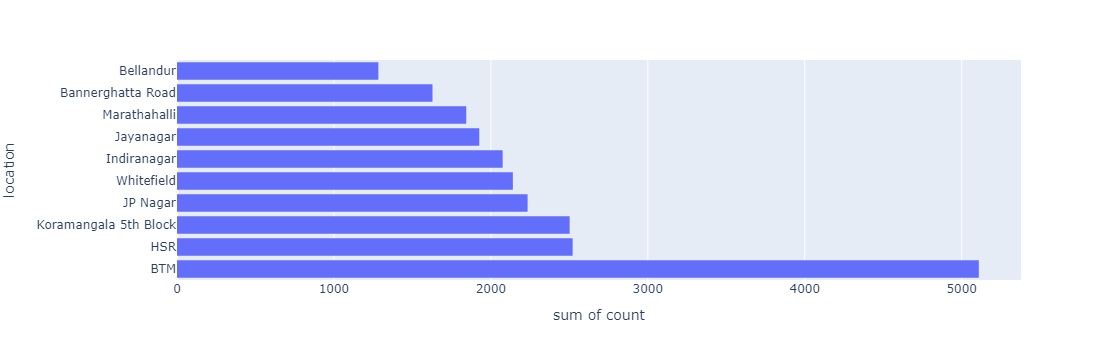

In [42]:
px.histogram(data_frame=  df_location_counts  , y = 'location' , x = 'count')

#### What is the distribution of restaurant ratings in Bangalore?

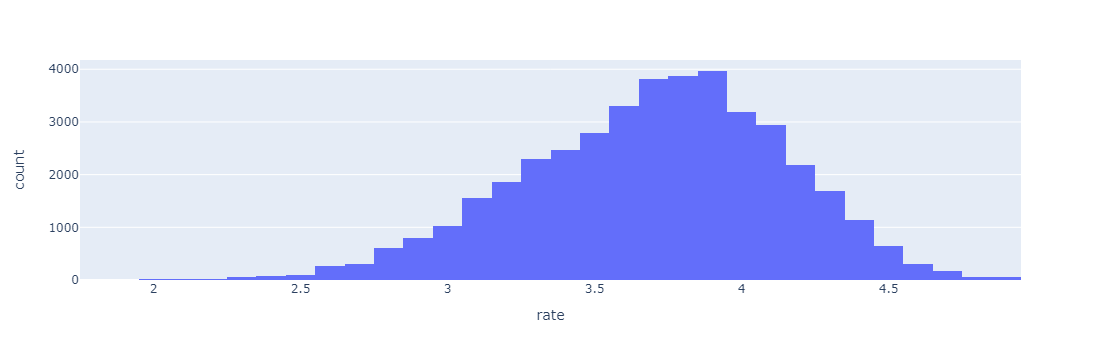

In [43]:
px.histogram(data_frame=df , x ="rate")

#### Are there any correlations between the number of votes a restaurant receives and its rating?

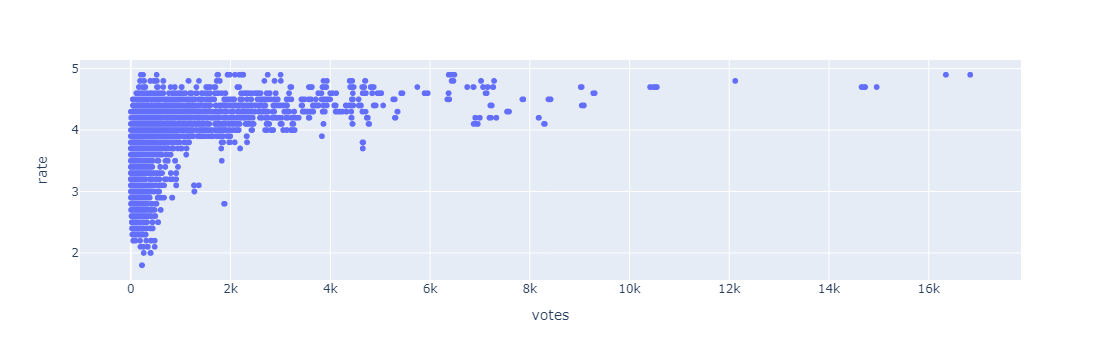

In [44]:
px.scatter(data_frame=df , x = "votes" , y = "rate")

In [45]:
df[["votes" , "rate"]].corr()

votes     rate
votes  1.00000  0.43354
rate   0.43354  1.00000

#### What are the top 10 rated restaurants ?

In [46]:
df.groupby("name")["rate"].mean().sort_values(ascending = False).head(10)

name
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Byg Brewski Brewing Company                                                         4.900000
Asia Kitchen By Mainland China                                                      4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
The Pizza Bakery                                                                    4.800000
O.G. Variar & Sons                                                                  4.800000
Flechazo                                                                            4.800000
AB's - Absolute Barbecues                                                           4.789474
Biergarten                                                                          4.766667
Name: rate, dtype: float64

#### How many restaurants offer online ordering and table booking services?

In [47]:
df[(df["online_order"] == "Yes")  & (df["book_table"] == "Yes")].groupby("rest_type")

#### Which restaurant types are most likely to offer online ordering and table booking?

In [48]:
df_rest_types = pd.DataFrame(df["rest_type"].astype(str).apply(lambda r : r.replace(", " , ",").split(",")))

In [49]:
df_rest_types

rest_type
0            [Casual Dining]
1            [Casual Dining]
2      [Cafe, Casual Dining]
3              [Quick Bites]
4            [Casual Dining]
...                      ...
51604                  [Bar]
51605                  [Bar]
51606                  [Bar]
51607                  [Bar]
51608   [Bar, Casual Dining]

[51609 rows x 1 columns]

In [50]:
df_rest_types_counts = pd.DataFrame(mlb.fit_transform(df_rest_types["rest_type"]) , columns=mlb.classes_)

In [51]:
df_rest_types_counts = pd.concat([df_rest_types_counts , df[["online_order" , "book_table"]]] , axis = 1 )

In [52]:
df_rest_types_counts[(df_rest_types_counts["online_order"] == "Yes")  & (df_rest_types_counts["book_table"] == "Yes")].sum(numeric_only=True).sort_values(ascending = False).head(10)

Casual Dining    2879
Cafe              749
Bar               705
Pub               274
Microbrewery      115
Quick Bites        96
Lounge             42
Fine Dining        29
Club               16
Irani Cafee        15
dtype: int64

#### How do the average ratings differ for restaurants with and without online ordering?

In [53]:
df.groupby("online_order")["rate"].mean()

online_order
No     3.658504
Yes    3.722287
Name: rate, dtype: float64

#### Are there any specific areas in Bangalore known for particular cuisines?

In [54]:
df_location_cuisnes = pd.concat([df_cuisnes , df["location"] ] , axis = 1 ).groupby("location").sum()

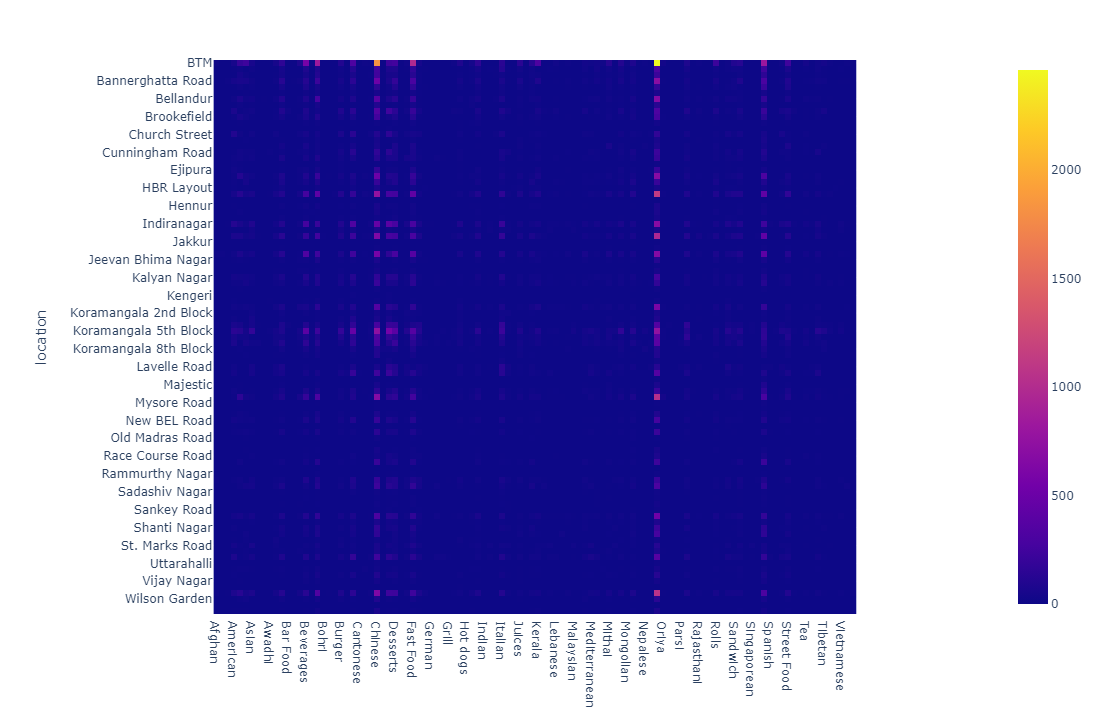

In [55]:
fig = px.imshow(df_location_cuisnes)
fig.update_layout(height = 720 , width = 1000)
fig.show()

#### What is the distribution of restaurant ratings based on the approximate cost for two people?

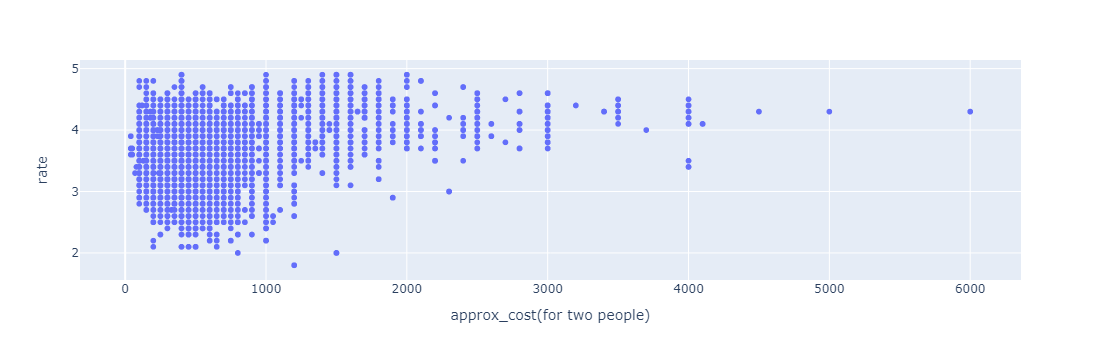

In [56]:
px.scatter(data_frame=df , y ="rate" , x = "approx_cost(for two people)")

In [57]:
df[["rate" , "approx_cost(for two people)"]].corr()

rate  approx_cost(for two people)
rate                         1.000000                     0.384281
approx_cost(for two people)  0.384281                     1.000000

#### Are there any differences in restaurant ratings based on the type of listing (e.g., buffet, delivery, dine-out)?

In [58]:
c

listed_in(type)
Buffet                3.981712
Cafes                 3.872477
Delivery              3.653024
Desserts              3.777013
Dine-out              3.680643
Drinks & nightlife    4.014504
Pubs and bars         4.021160
Name: rate, dtype: float64

In [59]:
df.dropna(inplace = True)

In [60]:
df.reset_index(inplace = True , drop = True)

In [61]:
df.drop(["name" , "votes" , 'rest_type', 'cuisines'] , axis = 1 , inplace = True)

In [62]:
df

online_order book_table  rate                    location  \
0              Yes        Yes   4.1                Banashankari   
1              Yes         No   4.1                Banashankari   
2              Yes         No   3.8                Banashankari   
3               No         No   3.7                Banashankari   
4               No         No   3.8                Basavanagudi   
...            ...        ...   ...                         ...   
41185           No         No   3.7                  Whitefield   
41186           No         No   2.5                  Whitefield   
41187           No         No   3.6                  Whitefield   
41188           No        Yes   4.3  ITPL Main Road, Whitefield   
41189           No         No   3.4  ITPL Main Road, Whitefield   

       approx_cost(for two people) listed_in(type) listed_in(city)  \
0                            800.0          Buffet    Banashankari   
1                            800.0          Buffet    Banashankari   
2                            800.0          Buffet    Banashankari   
3                            300.0          Buffet    Banashankari   
4                            600.0          Buffet    Banashankari   
...                            ...             ...             ...   
41185                        800.0   Pubs and bars      Whitefield   
41186                        800.0   Pubs and bars      Whitefield   
41187                       1500.0   Pubs and bars      Whitefield   
41188                       2500.0   Pubs and bars      Whitefield   
41189                       1500.0   Pubs and bars      Whitefield   

       rest_type_counts  cuisines_counts  
0                     1                3  
1                     1                3  
2                     2                3  
3                     1                2  
4                     1                2  
...                 ...              ...  
41185                 2                2  
41186                 2                4  
41187                 1                1  
41188                 1                1  
41189                 2                3  

[41190 rows x 9 columns]

In [63]:
cat_features = df.select_dtypes(include="object_")

In [65]:
df_locations_perc = df["location"].value_counts(normalize=True) * 100

In [66]:
desired_locations = df_locations_perc[df_locations_perc>0.5]

In [67]:
def fix_location(r):
    if r in desired_locations:
        return r
    else:
        return "other"

In [68]:
df["location"] = df["location"].apply(fix_location)

In [69]:
df["listed_in(city)"].value_counts(normalize=True) * 100

listed_in(city)
BTM                      6.258801
Koramangala 7th Block    5.729546
Koramangala 4th Block    5.469774
Koramangala 5th Block    5.455208
Koramangala 6th Block    5.146880
Jayanagar                4.646759
JP Nagar                 3.962127
Indiranagar              3.729060
MG Road                  3.663511
Church Street            3.629522
Brigade Road             3.597961
Lavelle Road             3.517844
Residency Road           3.262928
HSR                      3.226511
Marathahalli             3.136684
Bannerghatta Road        2.930323
Whitefield               2.915756
Old Airport Road         2.842923
Brookefield              2.765234
Basavanagudi             2.602573
Sarjapur Road            2.469046
Kammanahalli             2.469046
Kalyan Nagar             2.401068
Frazer Town              2.313668
Bellandur                2.311241
Malleshwaram             2.296674
Rajajinagar              2.117019
Electronic City          1.985919
Banashankari             1.76499

In [70]:
for feature in cat_features:
    print(f"Column {feature} has {df[feature].nunique()} different values ")

Column online_order has 2 different values 
Column book_table has 2 different values 
Column location has 45 different values 
Column listed_in(type) has 7 different values 
Column listed_in(city) has 30 different values 


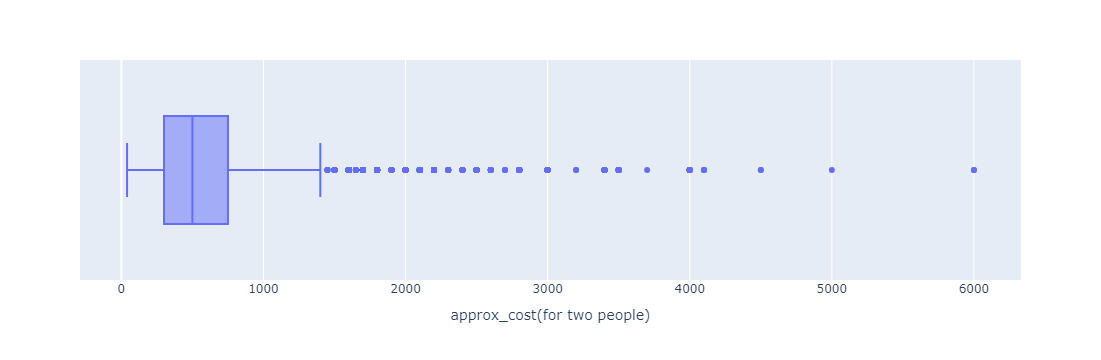

In [71]:
px.box(data_frame=df , x ="approx_cost(for two people)")

In [72]:
df

online_order book_table  rate      location  \
0              Yes        Yes   4.1  Banashankari   
1              Yes         No   4.1  Banashankari   
2              Yes         No   3.8  Banashankari   
3               No         No   3.7  Banashankari   
4               No         No   3.8  Basavanagudi   
...            ...        ...   ...           ...   
41185           No         No   3.7    Whitefield   
41186           No         No   2.5    Whitefield   
41187           No         No   3.6    Whitefield   
41188           No        Yes   4.3         other   
41189           No         No   3.4         other   

       approx_cost(for two people) listed_in(type) listed_in(city)  \
0                            800.0          Buffet    Banashankari   
1                            800.0          Buffet    Banashankari   
2                            800.0          Buffet    Banashankari   
3                            300.0          Buffet    Banashankari   
4                            600.0          Buffet    Banashankari   
...                            ...             ...             ...   
41185                        800.0   Pubs and bars      Whitefield   
41186                        800.0   Pubs and bars      Whitefield   
41187                       1500.0   Pubs and bars      Whitefield   
41188                       2500.0   Pubs and bars      Whitefield   
41189                       1500.0   Pubs and bars      Whitefield   

       rest_type_counts  cuisines_counts  
0                     1                3  
1                     1                3  
2                     2                3  
3                     1                2  
4                     1                2  
...                 ...              ...  
41185                 2                2  
41186                 2                4  
41187                 1                1  
41188                 1                1  
41189                 2                3  

[41190 rows x 9 columns]

In [74]:
df.to_csv("EDA_OUT.csv" , index = False)

##### Machine Learning Part

#### Create target

In [76]:
def Create_Target(r):
    if r >= 3.75:
        return 1
    else:
        return 0

In [78]:
df["rate"] = df["rate"].apply(Create_Target)

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [89]:
df

online_order book_table  rate      location  \
0              Yes        Yes     1  Banashankari   
1              Yes         No     1  Banashankari   
2              Yes         No     1  Banashankari   
3               No         No     0  Banashankari   
4               No         No     1  Basavanagudi   
...            ...        ...   ...           ...   
41185           No         No     0    Whitefield   
41186           No         No     0    Whitefield   
41187           No         No     0    Whitefield   
41188           No        Yes     1         other   
41189           No         No     0         other   

       approx_cost(for two people) listed_in(type) listed_in(city)  \
0                            800.0          Buffet    Banashankari   
1                            800.0          Buffet    Banashankari   
2                            800.0          Buffet    Banashankari   
3                            300.0          Buffet    Banashankari   
4                            600.0          Buffet    Banashankari   
...                            ...             ...             ...   
41185                        800.0   Pubs and bars      Whitefield   
41186                        800.0   Pubs and bars      Whitefield   
41187                       1500.0   Pubs and bars      Whitefield   
41188                       2500.0   Pubs and bars      Whitefield   
41189                       1500.0   Pubs and bars      Whitefield   

       rest_type_counts  cuisines_counts  
0                     1                3  
1                     1                3  
2                     2                3  
3                     1                2  
4                     1                2  
...                 ...              ...  
41185                 2                2  
41186                 2                4  
41187                 1                1  
41188                 1                1  
41189                 2                3  

[41190 rows x 9 columns]

In [94]:
Encoder = ColumnTransformer(transformers=[  ("OHE" , OneHotEncoder(sparse_output=False , drop="first") , ["online_order","book_table","listed_in(type)"]) 
                                          , ("BE",BinaryEncoder() , ["location","listed_in(city)"])   ] , remainder="passthrough")

In [109]:
Encoder_2 = ColumnTransformer(transformers=[  ("OHE" , OneHotEncoder(sparse_output=False , drop="first") , ["online_order","book_table"]) 
                                            , ("BE",BinaryEncoder() , ["location","listed_in(city)","listed_in(type)"])  ] , remainder="passthrough")

In [95]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LogisticRegression()) )
pipeline = Pipeline(steps = steps)

In [96]:
x = df.drop("rate" , axis = 1 )
y = df["rate"]

In [97]:
result = cross_validate(pipeline ,x , y, cv = 5 , scoring = "accuracy" , return_train_score=True)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from xgboost import XGBClassifier

In [105]:
models = []
models.append(("LR" , LogisticRegression()))
models.append(("CART" , DecisionTreeClassifier()))
models.append(("RF" , RandomForestClassifier()))
#models.append(("SVM" , SVC()))
models.append(("GNB" , GaussianNB()))
#models.append(("MNB" , MultinomialNB()))
models.append(("XGB" , XGBClassifier()))

In [106]:
for model in models:
    steps = []
    steps.append(("Encoder" , Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    result = cross_validate(pipeline ,x , y, cv = 5 , scoring = "accuracy" , return_train_score=True)
    print(f"{model[0]} AVG Train Accuracy is { result['train_score'].mean() }")
    print(f"{model[0]} AVG Test Accuracy is {result['test_score'].mean()}")
    print("*" * 30)

LR AVG Train Accuracy is 0.6989196406894876
LR AVG Test Accuracy is 0.6888807963097839
******************************
CART AVG Train Accuracy is 0.8990713765477057
CART AVG Test Accuracy is 0.7405923767904831
******************************
RF AVG Train Accuracy is 0.8990713765477057
RF AVG Test Accuracy is 0.7345472201990774
******************************
GNB AVG Train Accuracy is 0.6649793639232823
GNB AVG Test Accuracy is 0.6638018936635105
******************************
XGB AVG Train Accuracy is 0.8036841466375334
XGB AVG Test Accuracy is 0.7215586307356153
******************************


In [110]:
for model in models:
    steps = []
    steps.append(("Encoder" , Encoder_2))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(model )
    pipeline = Pipeline(steps = steps)
    result = cross_validate(pipeline ,x , y, cv = 5 , scoring = "accuracy" , return_train_score=True)
    print(f"{model[0]} AVG Train Accuracy is { result['train_score'].mean() }")
    print(f"{model[0]} AVG Test Accuracy is {result['test_score'].mean()}")
    print("*" * 30)

LR AVG Train Accuracy is 0.6968681718863803
LR AVG Test Accuracy is 0.6858460791454236
******************************
CART AVG Train Accuracy is 0.8990713765477057
CART AVG Test Accuracy is 0.7413935421218742
******************************
RF AVG Train Accuracy is 0.8990713765477057
RF AVG Test Accuracy is 0.7388443797038116
******************************
GNB AVG Train Accuracy is 0.6737436270939549
GNB AVG Test Accuracy is 0.669701383831027
******************************
XGB AVG Train Accuracy is 0.8030954115076474
XGB AVG Test Accuracy is 0.7159261956785627
******************************


In [111]:
from sklearn.model_selection import GridSearchCV

In [137]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , RandomForestClassifier(criterion="entropy",n_estimators= 75)) )
pipeline = Pipeline(steps = steps)

In [138]:
params = {
 "Model__max_depth"  : range(20,28)
}

In [139]:
grid = GridSearchCV(estimator=pipeline , cv = 5 , param_grid=params , scoring="accuracy" , return_train_score=True)

In [140]:
results = grid.fit(x,y)

In [141]:
results.cv_results_["mean_train_score"]

array([0.89705025, 0.89845229, 0.89882253, 0.89903496, 0.89902889,
       0.89907138, 0.89904103, 0.89904103])

In [142]:
results.cv_results_["mean_test_score"]

array([0.73056567, 0.73233795, 0.73343044, 0.73454722, 0.73476572,
       0.73491139, 0.7354455 , 0.73175528])

In [143]:
results.best_index_

6

In [144]:
results.cv_results_["mean_train_score"][results.best_index_]

0.8990410293760622

In [145]:
results.cv_results_["mean_test_score"][results.best_index_]

0.735445496479728

In [146]:
results.best_params_

{'Model__max_depth': 26}

In [147]:
Final_Model = results.best_estimator_

In [148]:
Final_Model.fit(x,y)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['online_order', 'book_table',
                                                   'listed_in(type)']),
                                                 ('BE', BinaryEncoder(),
                                                  ['location',
                                                   'listed_in(city)'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 RandomForestClassifier(criterion='entropy', max_depth=26,
                                        n_estimators=75))])

In [149]:
import joblib

In [150]:
joblib.dump(Final_Model , "Model.pkl"وcompress=3)
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [151]:
x.columns

Index(['online_order', 'book_table', 'location', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)', 'rest_type_counts',
       'cuisines_counts'],
      dtype='object')

In [161]:
df["rest_type_counts"].unique()

array([1, 2], dtype=int64)

In [163]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import sklearn
import category_encoders

Model = joblib.load("Model.pkl")
Inputs = joblib.load("Inputs.pkl")

def Make_Prdiction(online_order,book_table,location,approx_cost,listed_in,listed_in_city,rest_type_counts,cuisines_counts):
    Pr_df = pd.DataFrame(columns=Inputs)
    Pr_df.at[0,"online_order"] = online_order
    Pr_df.at[0,"book_table"] = book_table
    Pr_df.at[0,"location"] = location
    Pr_df.at[0,"rest_type_counts"] = rest_type_counts
    Pr_df.at[0,"approx_cost(for two people)"] = approx_cost
    Pr_df.at[0,"cuisines_counts"] = cuisines_counts
    Pr_df.at[0,"listed_in(type)"] = listed_in
    Pr_df.at[0,"listed_in(city)"] = listed_in_city
    result = Model.predict(Pr_df)
    return result[0]
    
def main():
    st.title("Zomato Resturants")
    online_order= st.selectbox("online_order",['Yes', 'No']) 
    book_table = st.selectbox("book_table" ,['Yes', 'No'] )
    location = st.selectbox("location" ,['Banashankari', 'Basavanagudi', 'other', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'St. Marks Road', 'Cunningham Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Kammanahalli', 'Koramangala 6th Block', 'Brookefield',
       'Koramangala 4th Block', 'Banaswadi', 'Kalyan Nagar',
       'Malleshwaram', 'Rajajinagar', 'New BEL Road'] )
    rest_type_counts = st.selectbox("rest_type_counts" ,[1, 2] )
    approx_cost = st.slider("approx_cost" ,  min_value=40, max_value=6000, value=0, step=1)
    cuisines_counts = st.selectbox("cuisines_counts" ,[3, 2, 1, 4, 5, 8, 7, 6] )
    listed_in = st.selectbox("listed_in_types" ,['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out','Drinks & nightlife', 'Pubs and bars'] )
    listed_in_city = st.selectbox("listed_in_city" ,['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'] )
    if st.button("Predict"):
        Results = Make_Prdiction(online_order,book_table,location,approx_cost,listed_in,listed_in_city,rest_type_counts,cuisines_counts)
        list_success = ["Your Resturant May Fail" , "Your Resturant will success"]
        st.text(list_success[Results])
main()



Overwriting app.py
